In [1]:
from google.colab import drive

drive.mount('/content/dataset')

Mounted at /content/dataset


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
train_df = pd.read_csv('/content/dataset/MyDrive/bike-sharing-dataset/train.csv')
test_df = pd.read_csv('/content/dataset/MyDrive/bike-sharing-dataset/test.csv')
submission_df = pd.read_csv('/content/dataset/MyDrive/bike-sharing-dataset/sampleSubmission.csv')


In [6]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['minute'] = train_df['datetime'].dt.minute
train_df['second'] = train_df['datetime'].dt.second
train_df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [7]:
print(train_df['minute'].value_counts())
print(train_df['second'].value_counts())


minute
0    10886
Name: count, dtype: int64
second
0    10886
Name: count, dtype: int64


In [8]:
train_df = train_df.drop(['minute', 'second'], axis=1)
train_df.columns


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [9]:
test_df['datetime'] = pd.to_datetime(test_df['datetime'])
test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['day'] = test_df['datetime'].dt.day
test_df['hour'] = test_df['datetime'].dt.hour


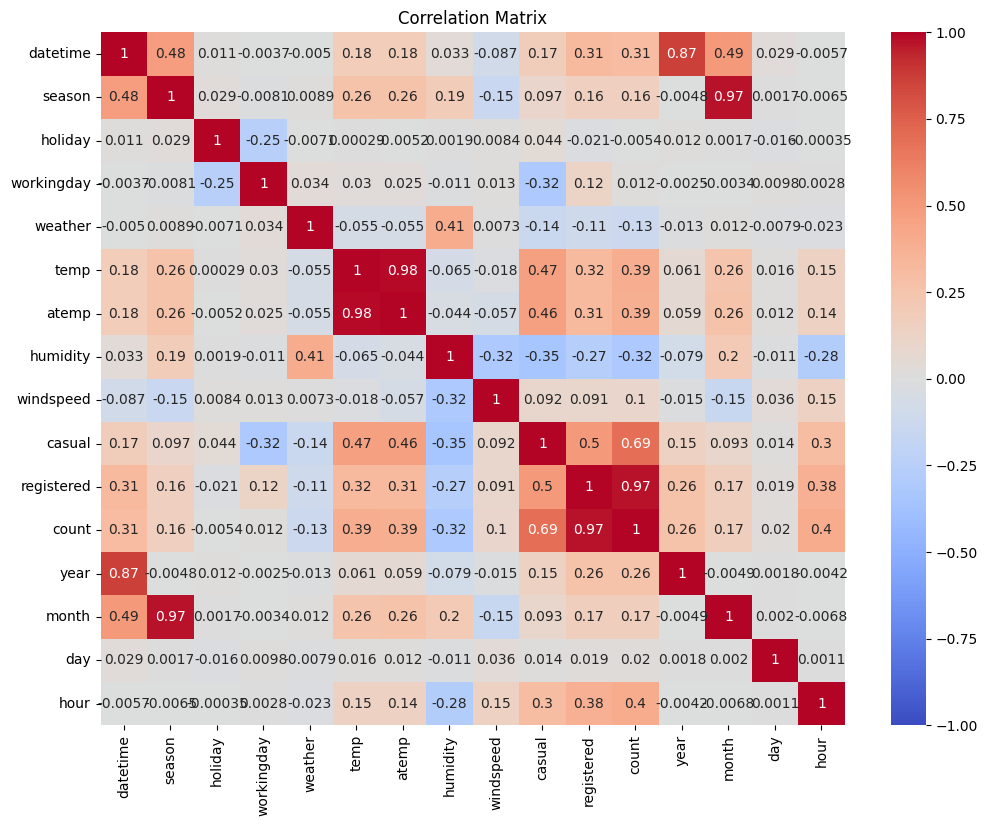

In [10]:
df = pd.DataFrame(train_df)

# 상관 계수 계산
correlation_matrix = df.corr()

# 상관 계수 히트맵 시각화
plt.figure(figsize=(12,9))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, center=0, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [11]:
X = train_df.drop(columns='count')
y = train_df['count']


In [12]:
X = train_df.drop(columns=['count', 'casual', 'registered', 'datetime'])
y = train_df['count']


In [13]:
X_test = test_df.drop(columns=['datetime'])


In [14]:
print(f'Train data shape: {X.shape}')
print(f'Number of null values: {X.isna().sum().sum()}')
print(f'\nTest data shape: {X_test.shape}')
print(f'Number of null values: {X_test.isna().sum().sum()}')


Train data shape: (10886, 12)
Number of null values: 0

Test data shape: (6493, 12)
Number of null values: 0


In [15]:
def separate_train(df): # 'count' 피쳐를 y로 구분
    X = df.drop(['datetime', 'casual', 'registered', 'count'], axis=1)
    y = df['count']
    return X, y

def separate_test(df): # 'count' 피쳐를 y로 구분
    X_test = df.drop('datetime', axis=1)
    return X_test


In [16]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

print(f'Train data shape: {X.shape}')
print(f'Number of null values: {X.isna().sum().sum()}')
print(f'\nTest data shape: {X_test.shape}')
print(f'Number of null values: {X_test.isna().sum().sum()}')


Train data shape: (10886, 12)
Number of null values: 0

Test data shape: (6493, 12)
Number of null values: 0


In [18]:
def separate_train(df): # 'count' 피쳐를 y로 구분
    X = df.drop(['datetime', 'casual', 'registered', 'count'], axis=1)
    y = df['count']
    return X, y

def separate_test(df): # 'count' 피쳐를 y로 구분
    X_test = df.drop('datetime', axis=1)
    return X_test


In [19]:
def separate_train(df): # 'count' 피쳐를 y로 구분
    X = df.drop(['datetime', 'casual', 'registered', 'count'], axis=1)
    y = df['count']
    return X, y

def separate_test(df): # 'count' 피쳐를 y로 구분
    X_test = df.drop('datetime', axis=1)
    return X_test


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
y_valid_pred = model.predict(X_valid)


In [24]:
from sklearn.metrics import mean_squared_log_error
y_valid_pred = np.maximum(0, y_valid_pred)

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'\nValidation Data RMSLE: {rmsle:.5f}')



Validation Data RMSLE: 1.30575


In [25]:
y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(0, y_test_pred)


In [26]:
submission_df['count'] = y_test_pred
submission_df.to_csv('submission_baseline.csv', index=False)
submission_df


,datetime,count
0,2011-01-20 00:00:00,0.000000
1,2011-01-20 01:00:00,0.000000
2,2011-01-20 02:00:00,0.000000
3,2011-01-20 03:00:00,0.000000
4,2011-01-20 04:00:00,0.000000
...,...,...
6488,2012-12-31 19:00:00,299.166115
6489,2012-12-31 20:00:00,307.029709
6490,2012-12-31 21:00:00,320.079545
6491,2012-12-31 22:00:00,338.774422
